# Customer Cart Abandonment

## Introduction

Abandonment is an e-commerce term used to describe a visitor on a web page who leaves that page before completing the desired action. Examples of abandonment include shopping cart abandonment, referring to visitors who add items to their online shopping cart, but exit without completing the purchase.

The dataset consists of 13 attributes:

ID: The session id of the customer.

Is_Product_Details_viewed: Whether the customer is viewing the product details or not.

Session_Activity_Count: How many times a customer is going to the different pages.

No_Items_Added_InCart: Number of items in cart.

No_Items_Removed_FromCart: Number of items removed from the cart.

No_Cart_Viewed: How many times the customer is going to the cart page.

No_Checkout_Confirmed: How many times the checkout has been confirmed successfully by the customer.

No_Checkout_Initiated: How many times the checkout(successful as well as unsuccess) is being done by the user.

No_Cart_Items_Viewed: How many times a user is viewing the product from cart.

No_Customer_Login: Number of times the customer had did log in.

No_Page_Viewed: Number of pages viewed by the customer. Customer_Segment_Type: The customer falls under which category,i.e, 0 for Target Customer, 1 for Loyal Customer, and 2 for Untargeted customer.

Cart_Abandoned: Whether the customer is doing cart abandonment or not. This is the target variable that we need to predict.

#### The dataset used in this case is real and was taken from an organization for research purposes. The dataset contains 4284 rows and 13 columns.

## Import Libraries

In [5]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Business Understanding

If a customer will visits the webpage then at that time we have to predict whether the customer will do abandonment or not. By doing so, we can give those customers some suitable offers so that cart abandonmet ratio will decrease which in terms increase in profits. There are few questions that we can able to answer by doing analysis:

1. If a customer is viewing the product details then what is the chance that he is doing cart abandonment?
2. What are the important factors related to cart abandonment?
3. How can we able to know whether a customer will do abandonment or not in future?

## 2. Data Understanding

### Read Dataset

In [24]:
dataset = pd.read_csv('data_cart_abandonment.csv')
dataset.head()

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [25]:
dataset.shape


(4284, 13)

In [26]:
dataset.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

In [28]:
dataset.describe()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


In [29]:
dataset.Cart_Abandoned=pd.Categorical(dataset.Cart_Abandoned)
dataset.Cart_Abandoned.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [30]:
dataset.Customer_Segment_Type=pd.Categorical(dataset.Customer_Segment_Type)

In [31]:
dataset.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                float64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

In [34]:
num=dataset.select_dtypes(include=["float64","int64"])
cat=dataset.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [35]:
num.shape

(4284, 9)

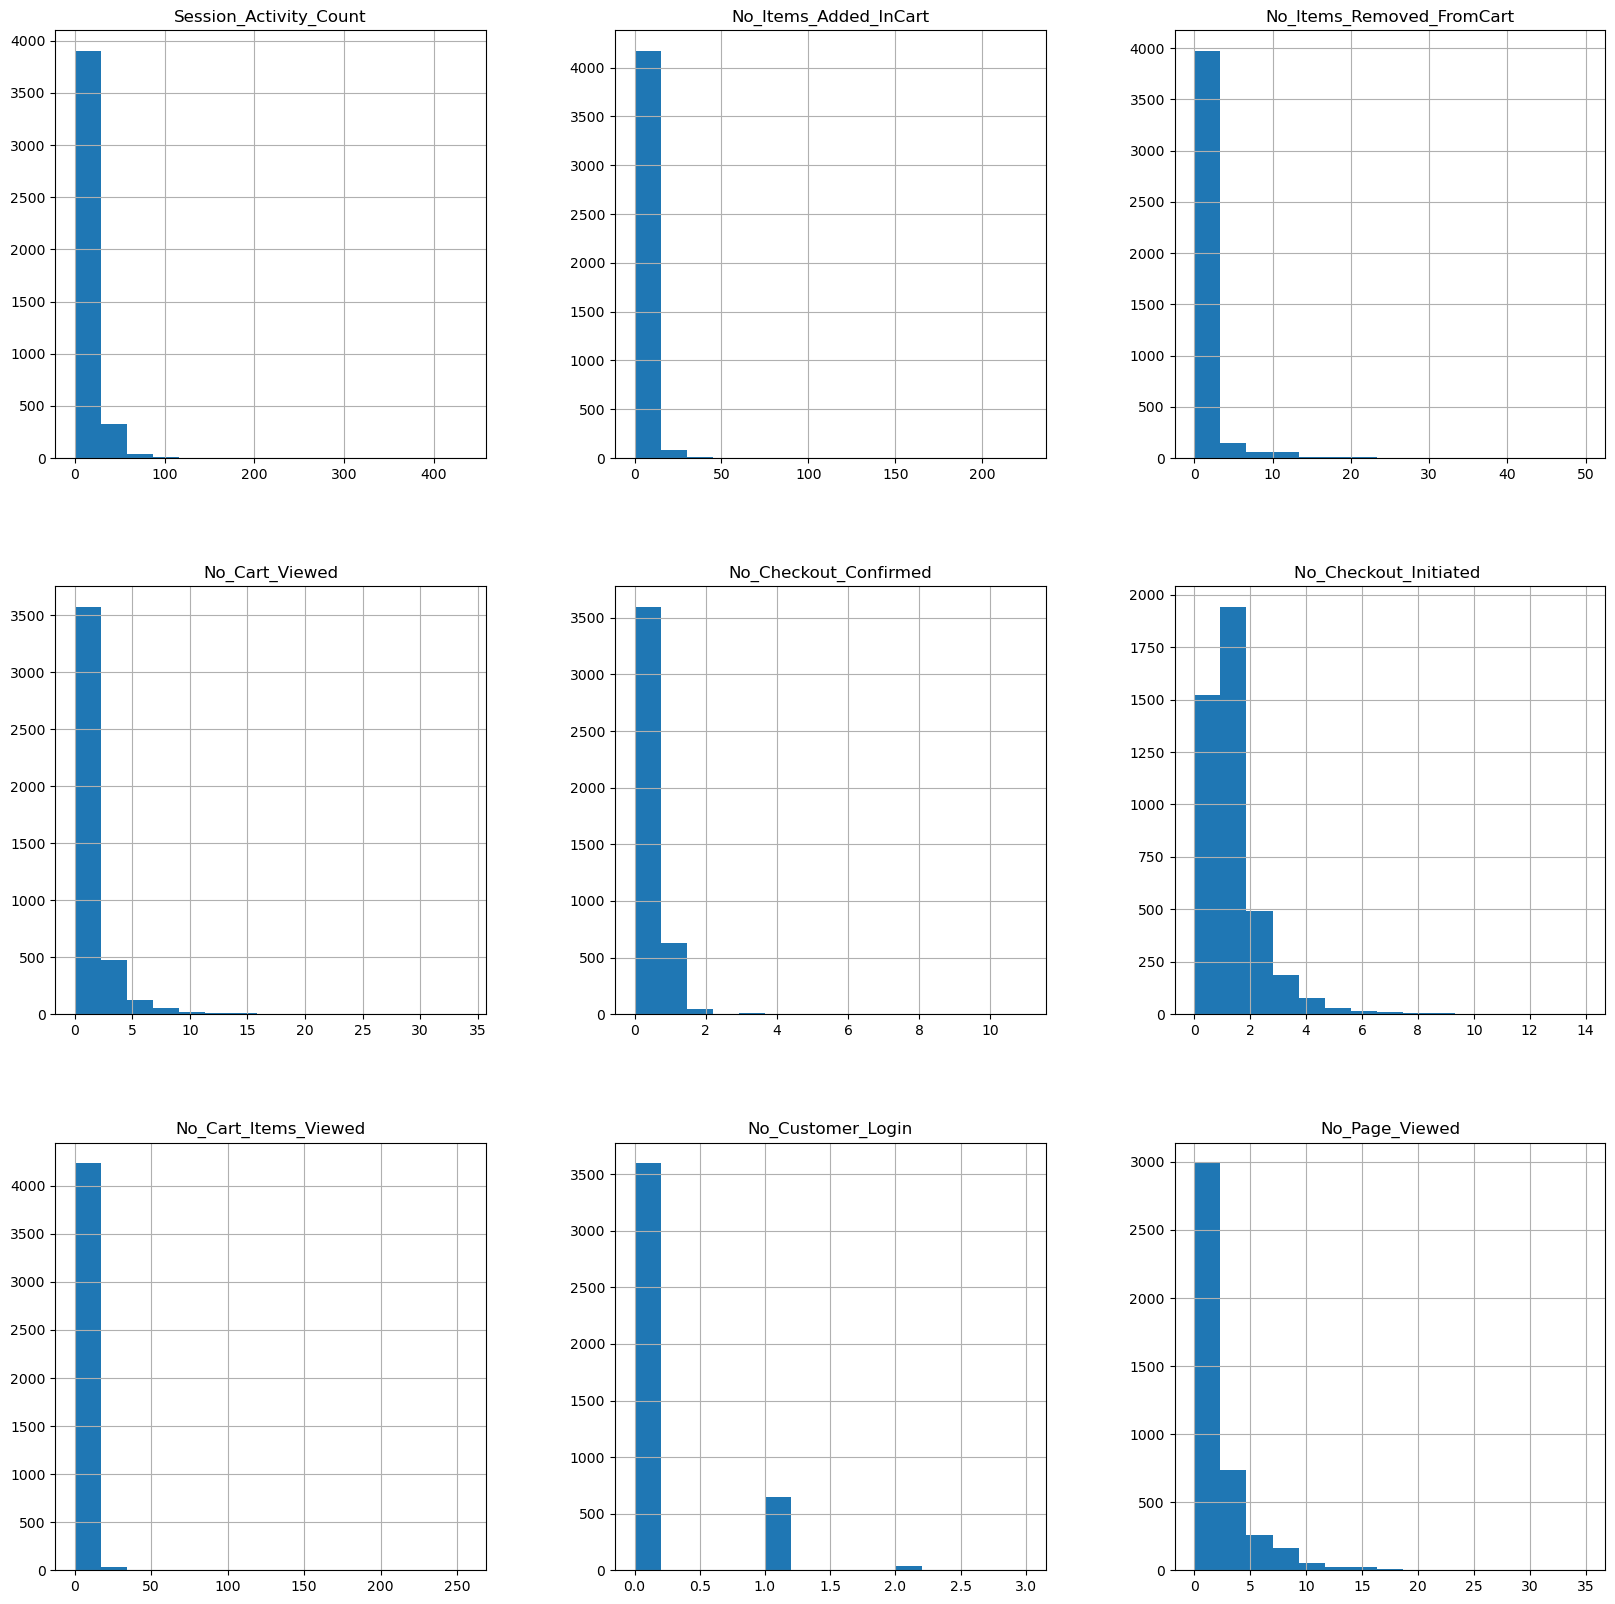

In [38]:
num.hist(bins=15, figsize=(20, 20), layout=(3, 3));

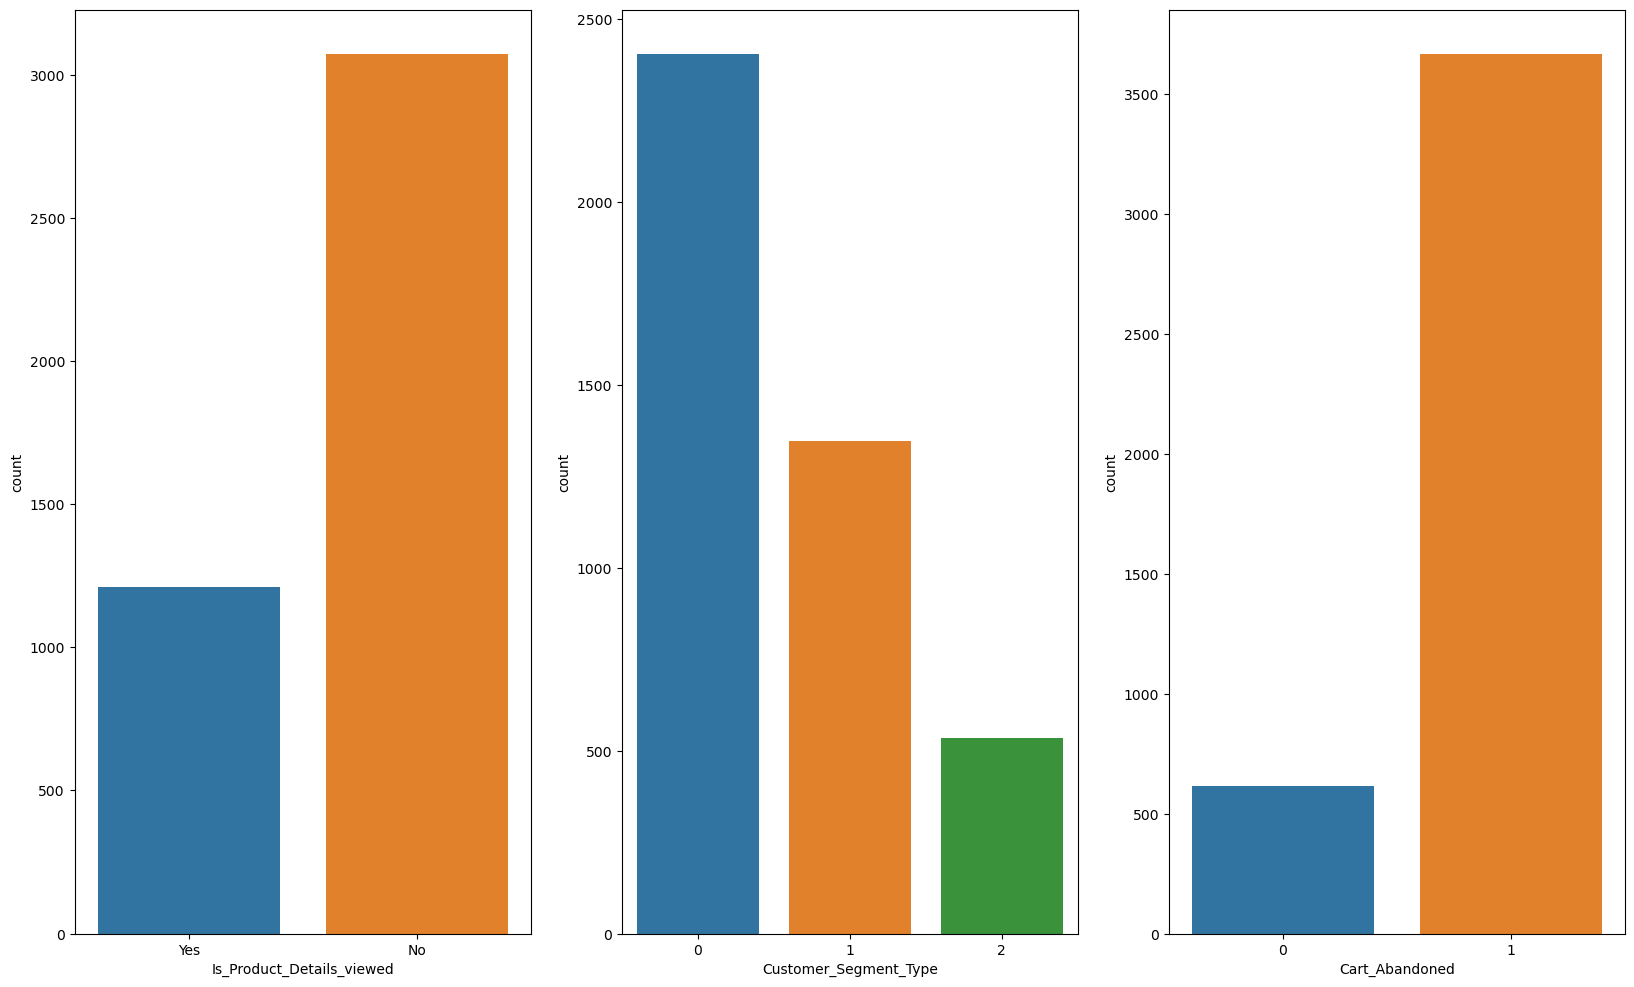

In [40]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 12))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

### Part 1 : If a customer is viewing the product details then what is the chance that he is doing cart abandonment?

<Axes: xlabel='Is_Product_Details_viewed', ylabel='count'>

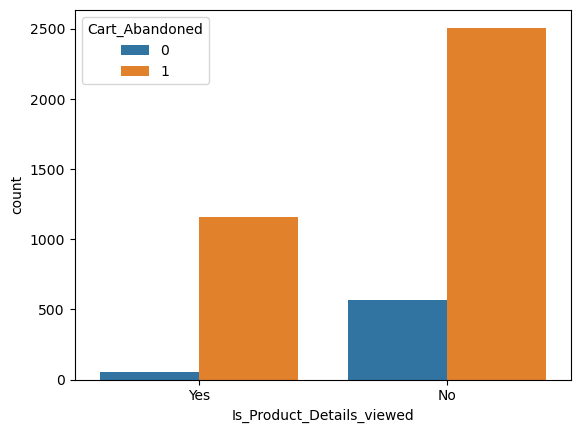

In [41]:
sns.countplot(x=dataset.Is_Product_Details_viewed,hue=dataset.Cart_Abandoned)

### 2.1 FOR NUMERICAL : Numerical Attributes Vrs Cart_Abandoned : By BoxPlot


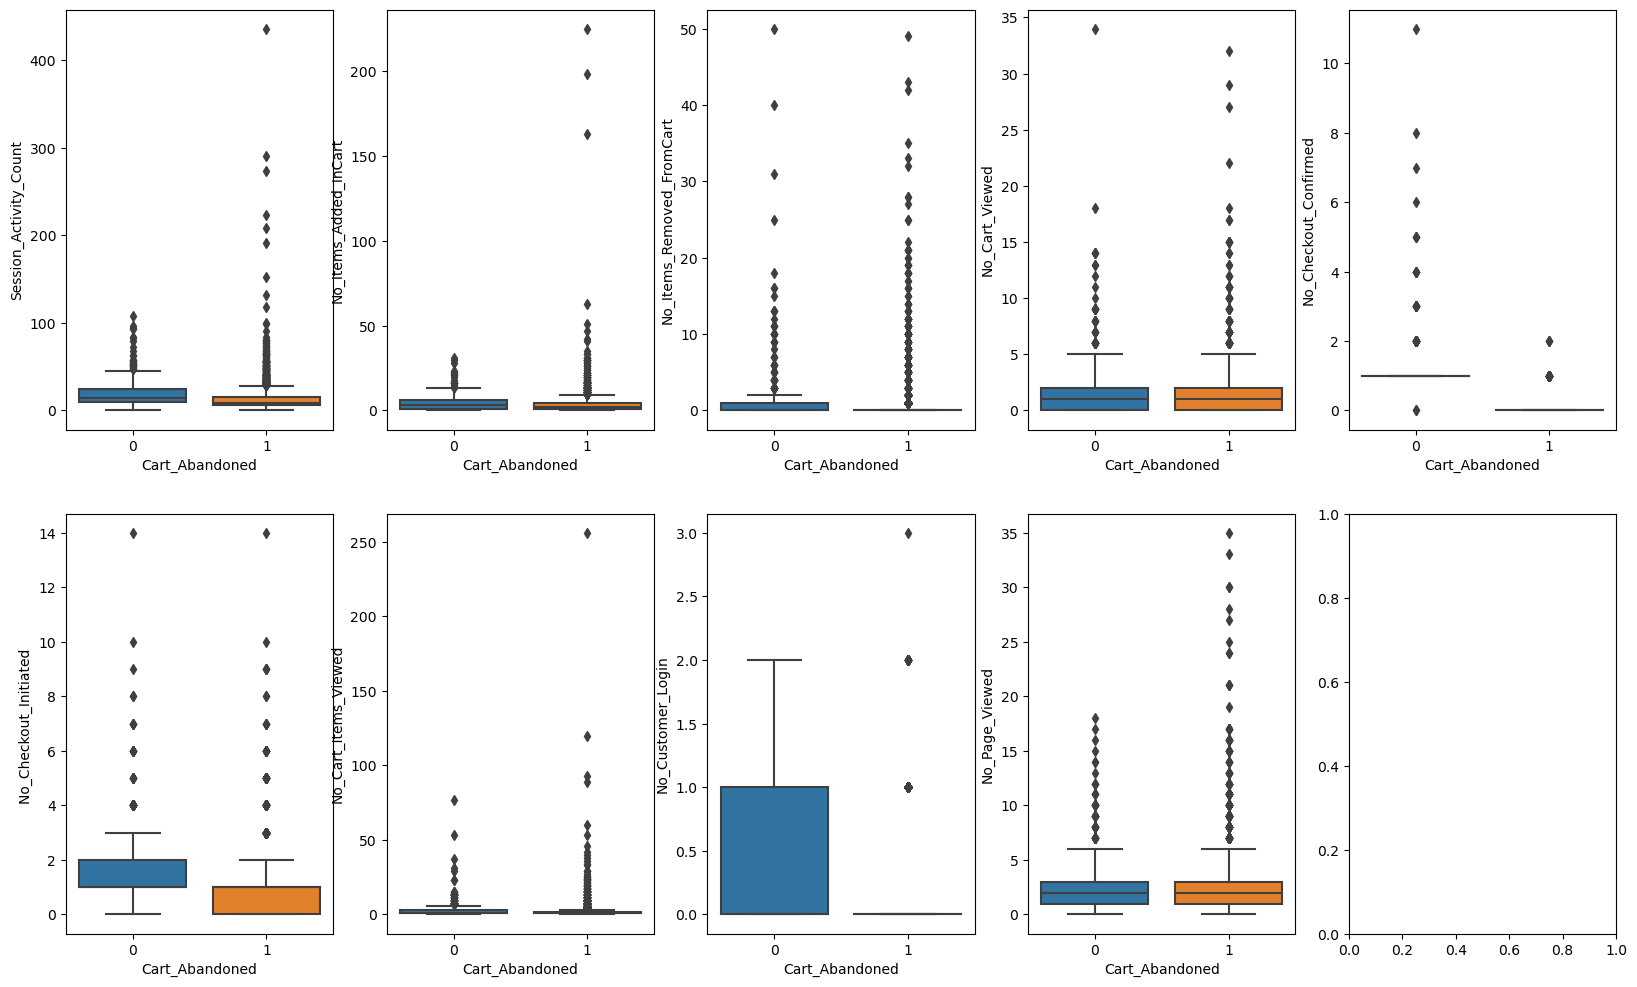

In [43]:
fig, ax = plt.subplots(2, 5, figsize=(20, 12))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=cat["Cart_Abandoned"], y=num[var], ax=subplot)

### 2.2 Correlation plot of Independent attributes

<Axes: >

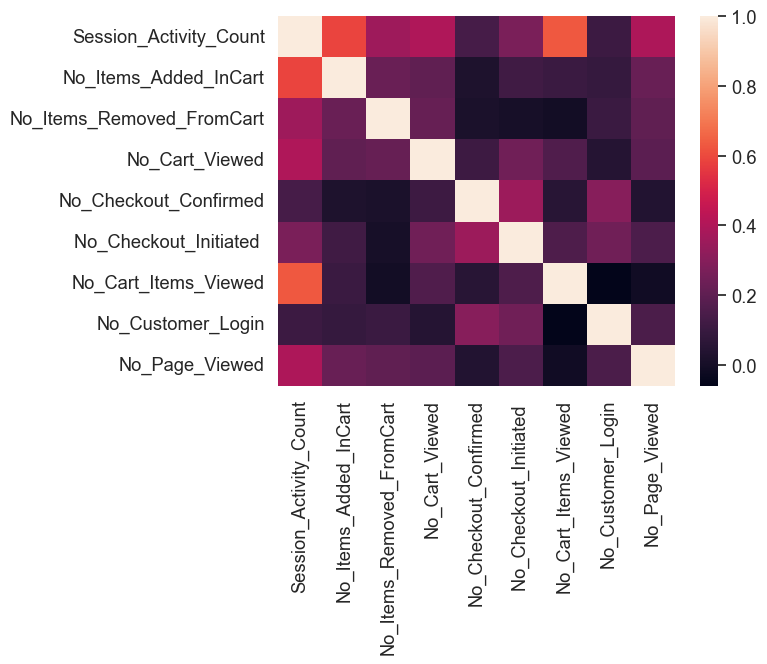

In [49]:
corr = num.corr()
sns.heatmap(corr)

## 3. Data Preparation

In [50]:
data = dataset.copy()
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [51]:
null_col = data.columns[data.isna().any()].tolist()
null_col

['No_Items_Added_InCart', 'No_Cart_Viewed']

In [52]:
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].fillna(data['No_Items_Added_InCart'].mean()) 
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].fillna(data['No_Cart_Viewed'].mean())
data[null_col] = data[null_col].astype("int64")
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

### 1.Taking care of Outliers by Normalizing the Data : By MinMax Normalization

In [53]:
num=data.select_dtypes(include=["int64"])
cat=data.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [54]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
x_scaled

array([[0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.08715596, 0.        , 0.        , ..., 0.0078125 , 0.        ,
        0.05714286],
       [0.01834862, 0.02222222, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       ...,
       [0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.01834862, 0.01333333, 0.        , ..., 0.00390625, 0.        ,
        0.05714286],
       [0.07110092, 0.01777778, 0.        , ..., 0.02734375, 0.        ,
        0.02857143]])

In [55]:
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head(3)

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,0.009174,0.004444,0.0,0.000000,0.000000,0.000000,0.003906,0.0,0.000000
1,0.087156,0.000000,0.0,0.058824,0.000000,0.000000,0.007812,0.0,0.057143
2,0.018349,0.022222,0.0,0.000000,0.090909,0.071429,0.003906,0.0,0.000000


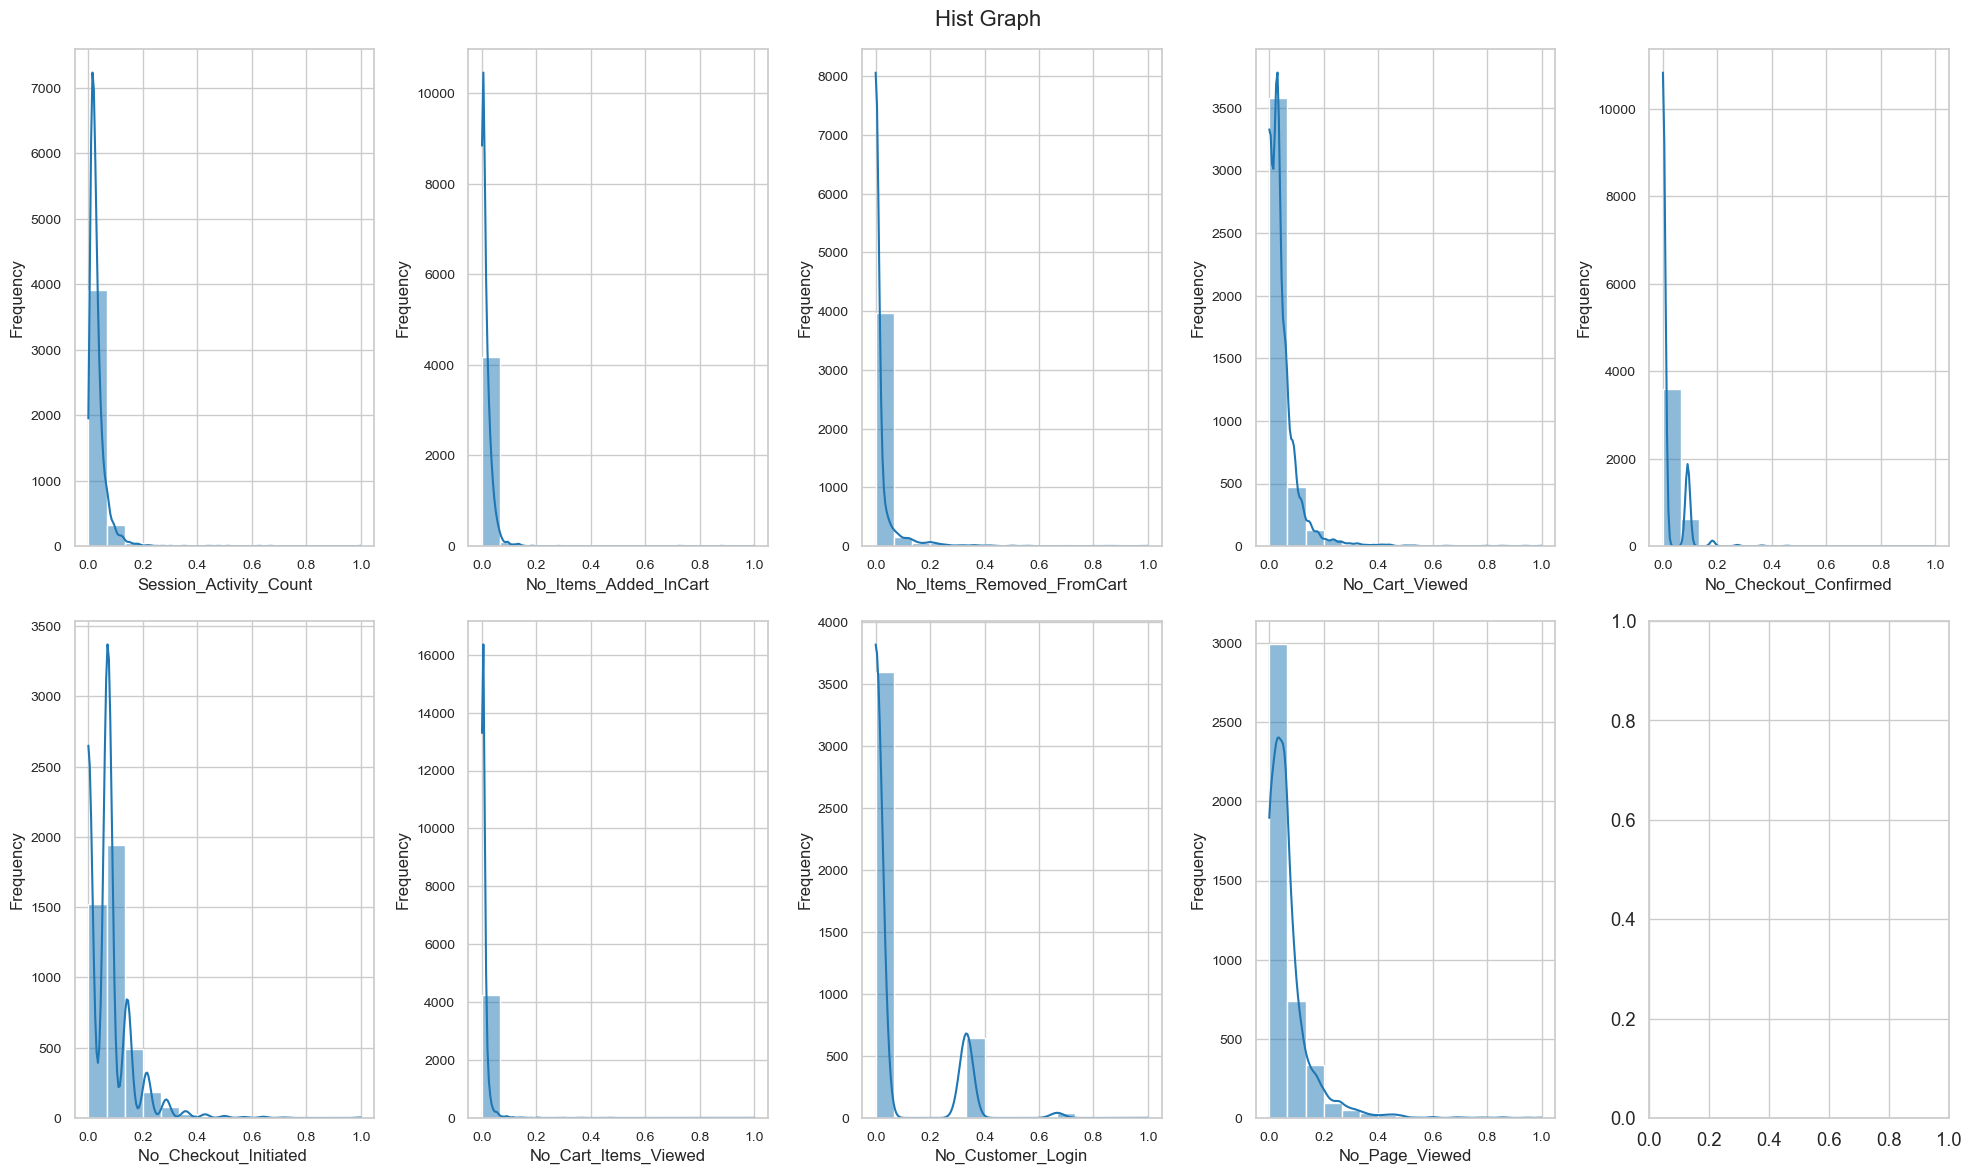

In [63]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
plt.suptitle("Hist Graph", fontsize=16)

for i, column in enumerate(df_scaled.columns):
    sns.histplot(data=df_scaled, x=column, bins=15, kde=True, ax=axes[i//5, i%5], color='#1f77b4')
    axes[i//5, i%5].set_xlabel(column, fontsize=12)
    axes[i//5, i%5].set_ylabel("Frequency", fontsize=12)
    axes[i//5, i%5].tick_params(axis='both', which='major', labelsize=10)
    
plt.tight_layout()
plt.show()

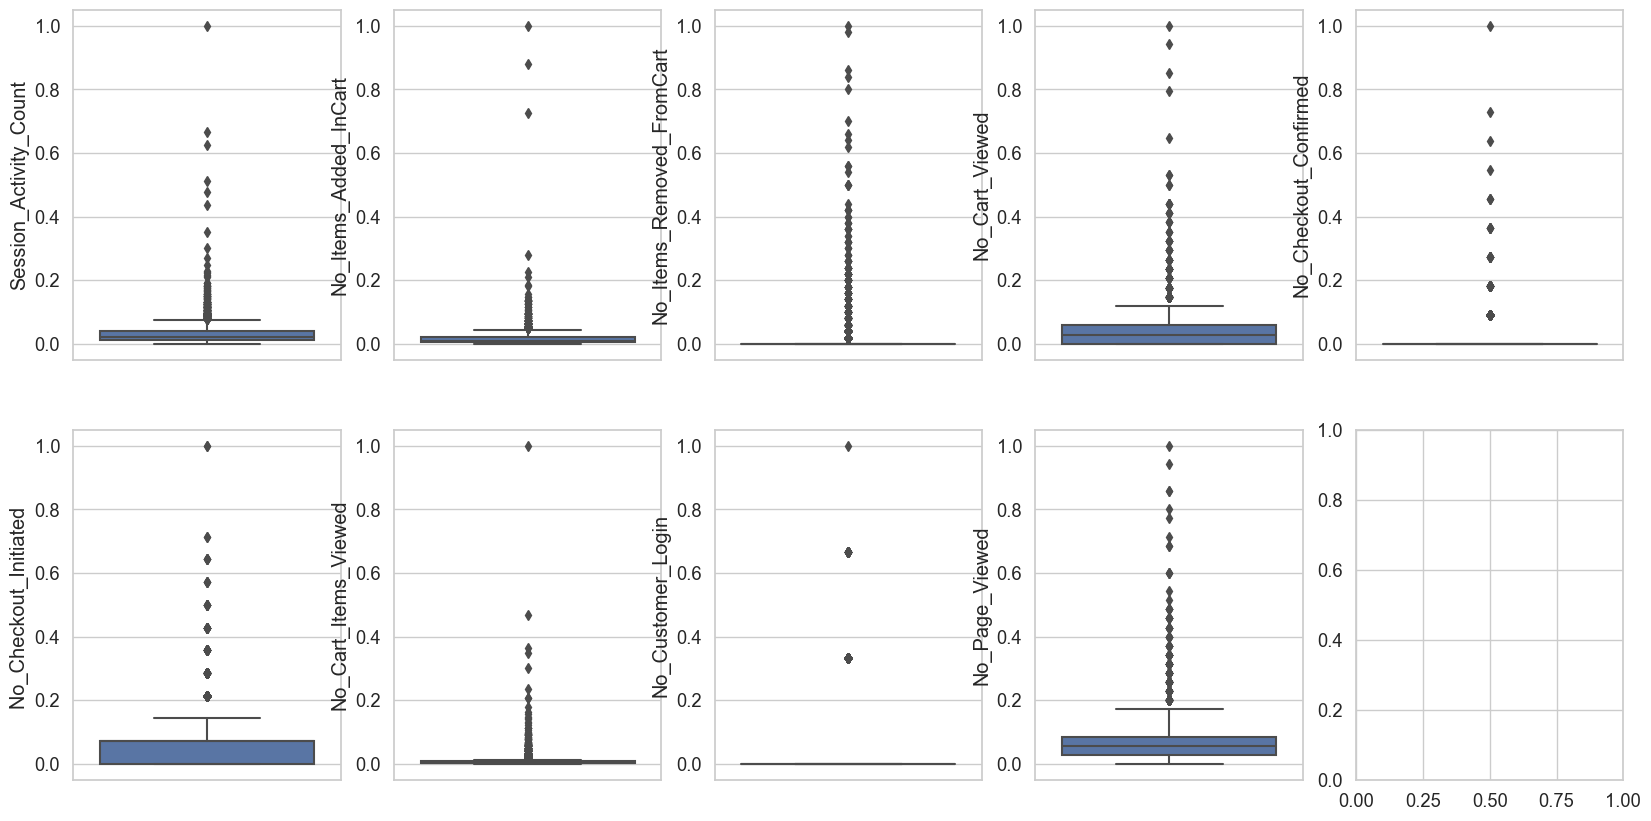

In [64]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled[var], ax=subplot)

### 2.Taking care of Outliers by Normalizing the Data : By BoxCox Normalization

In [65]:
df_scaled_boxcox=boxcox1p(num, 0)

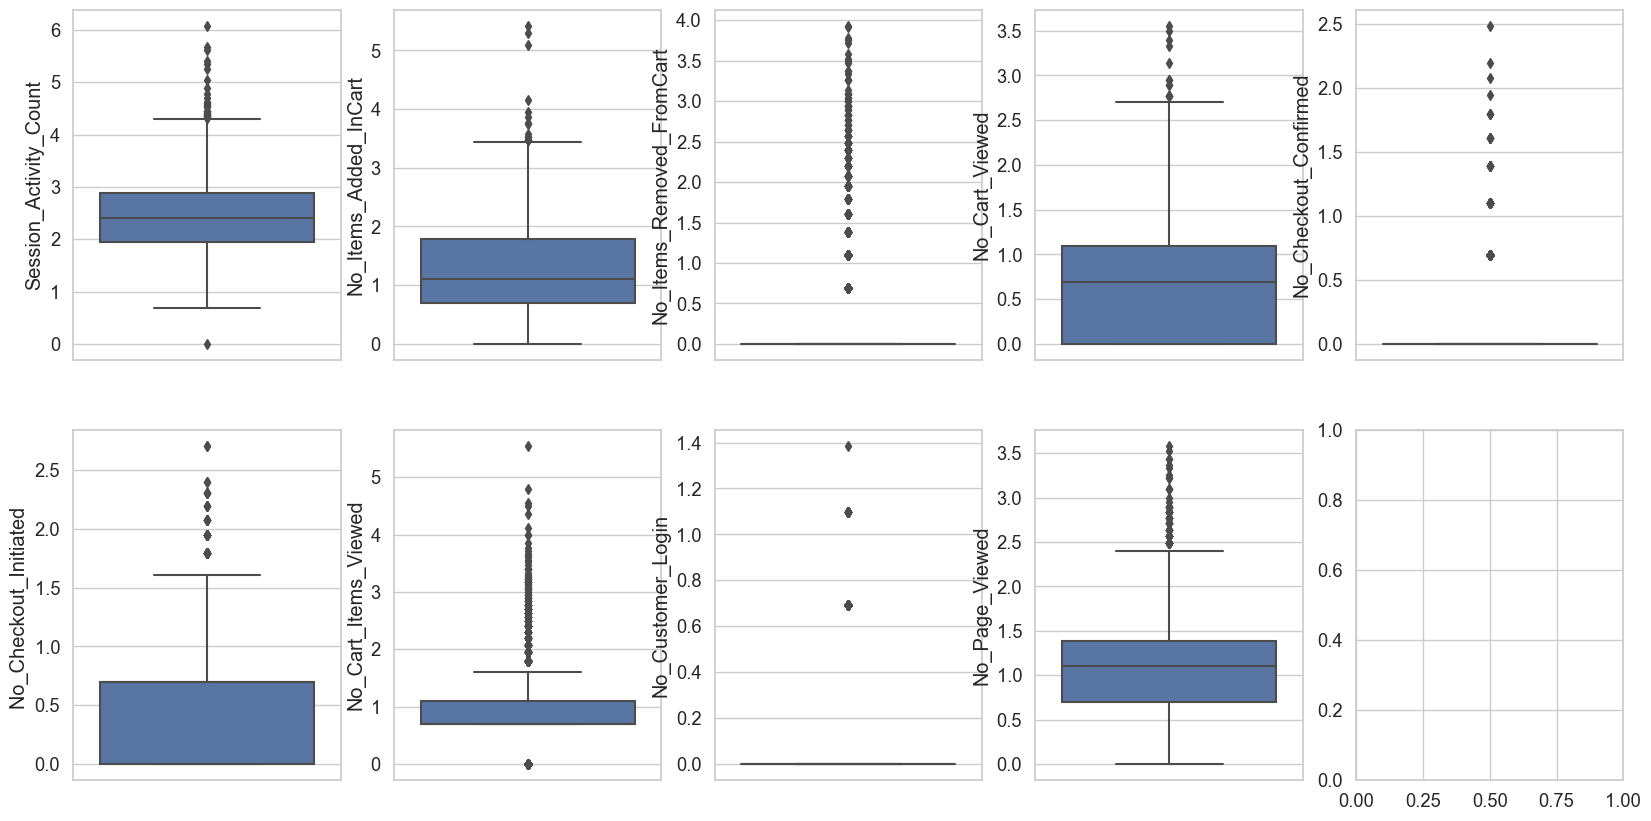

In [66]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled_boxcox.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled_boxcox[var], ax=subplot)

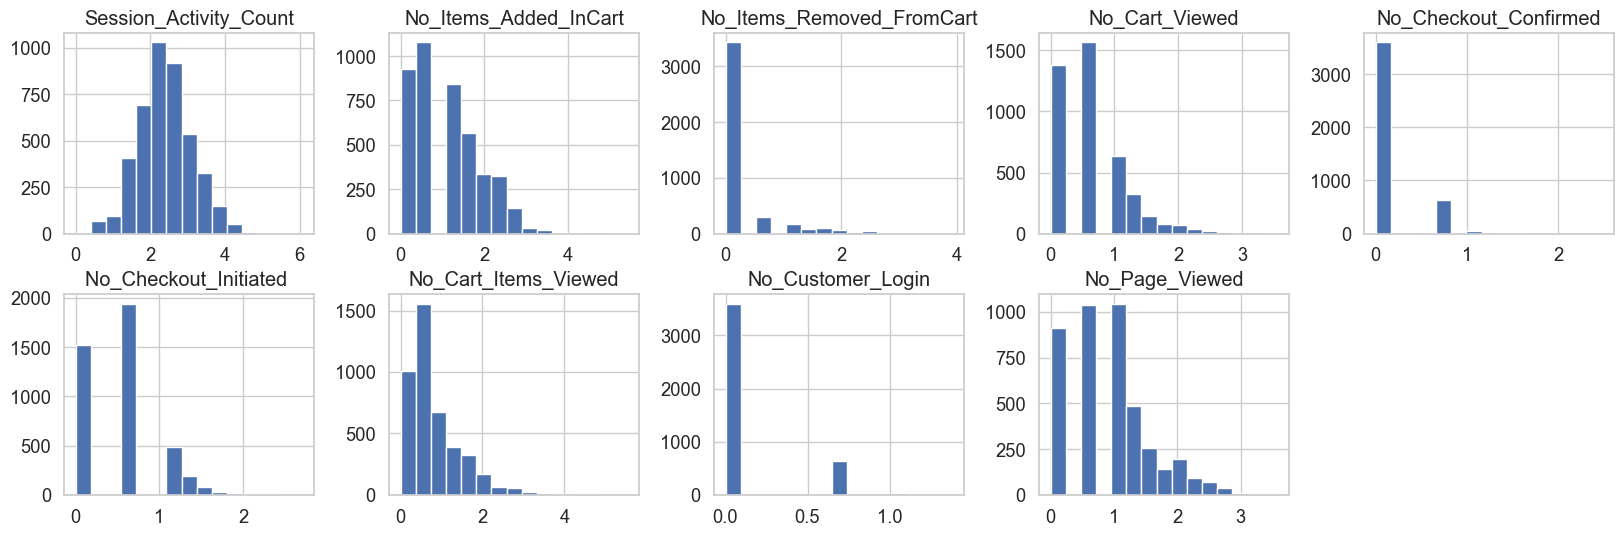

In [67]:
df_scaled_boxcox.hist(bins=15, figsize=(20, 6), layout=(2, 5));

In [68]:
df_scaled_boxcox.head(3)

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000
1,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612
2,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000


In [70]:
df_scaled_boxcox["ID"]=data.ID
df_scaled_boxcox.set_index('ID',inplace=True)
df_scaled_boxcox.reset_index(inplace=True)

In [71]:
df_final=df_scaled_boxcox.join(cat)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,NaN,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,Yes,0,1
1,NaN,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612,No,0,1
2,NaN,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000,No,1,0


In [72]:
df_final.Is_Product_Details_viewed.replace({"Yes":1,"No":0},inplace=True)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,NaN,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,1,0,1
1,NaN,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612,0,0,1
2,NaN,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000,0,1,0


In [79]:
df_final.Is_Product_Details_viewed=pd.Categorical(df_final.Is_Product_Details_viewed)
df_final.dtypes

ID                             object
Session_Activity_Count        float64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart     float64
No_Cart_Viewed                float64
No_Checkout_Confirmed         float64
No_Checkout_Initiated         float64
No_Cart_Items_Viewed          float64
No_Customer_Login             float64
No_Page_Viewed                float64
Is_Product_Details_viewed    category
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

## Feature Selection

### 1. By RFE

In [84]:
X=df_final.iloc[:,1:12]
X.shape

(4284, 11)

In [85]:
y=df_final["Cart_Abandoned"]
y.name

'Cart_Abandoned'

In [87]:
lr = LogisticRegression()
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=7, verbose = 3 )
fit=rfe.fit(X,y)
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Num Features: 7
Selected Features: [ True False False  True  True  True False  True  True  True False]
Feature Ranking: [1 2 4 1 1 1 5 1 1 1 3]


In [88]:
l = [i for i,x in enumerate(list(fit.support_)) if x == True]

In [89]:
X.columns

Index(['Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type'],
      dtype='object')

In [90]:
feature_selected = [X[X.columns[l[i]]].name for i,x in enumerate(l)]

In [91]:
feature_selected

['Session_Activity_Count',
 'No_Cart_Viewed',
 'No_Checkout_Confirmed',
 'No_Checkout_Initiated ',
 'No_Customer_Login',
 'No_Page_Viewed',
 'Is_Product_Details_viewed']

### 2.By Random Forest Classifier

In [92]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)
feature_weightage_dict = dict()
# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    feature_weightage_dict.update({feature[0]:feature[1]})

In [93]:
feature_weightage_dict

{'Session_Activity_Count': 0.05052857005529642,
 'No_Items_Added_InCart': 0.025547984898027527,
 'No_Items_Removed_FromCart': 0.010172300692196705,
 'No_Cart_Viewed': 0.017810335296951977,
 'No_Checkout_Confirmed': 0.7341868777064404,
 'No_Checkout_Initiated ': 0.0441808380652188,
 'No_Cart_Items_Viewed': 0.018703955749515146,
 'No_Customer_Login': 0.05604221107820115,
 'No_Page_Viewed': 0.027120211503535017,
 'Is_Product_Details_viewed': 0.009764913736069736,
 'Customer_Segment_Type': 0.0059418012185472185}

In [94]:
sorted_feature_weightage_dict = sorted(feature_weightage_dict.items(), key=lambda kv: kv[1], reverse = True)

In [95]:
sorted_feature_weightage_dict

[('No_Checkout_Confirmed', 0.7341868777064404),
 ('No_Customer_Login', 0.05604221107820115),
 ('Session_Activity_Count', 0.05052857005529642),
 ('No_Checkout_Initiated ', 0.0441808380652188),
 ('No_Page_Viewed', 0.027120211503535017),
 ('No_Items_Added_InCart', 0.025547984898027527),
 ('No_Cart_Items_Viewed', 0.018703955749515146),
 ('No_Cart_Viewed', 0.017810335296951977),
 ('No_Items_Removed_FromCart', 0.010172300692196705),
 ('Is_Product_Details_viewed', 0.009764913736069736),
 ('Customer_Segment_Type', 0.0059418012185472185)]

In [96]:
df_final.columns

Index(['ID', 'Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type',
       'Cart_Abandoned'],
      dtype='object')

### Part 2: What are the important factors related to cart abandonment?

Now comparing both the models we can see the No_Items_Added_InCart, No_Checkout_Confirmed, No_Checkout_Initiated, No_Customer_Login and No_Page_Viewed has the higher feature importance. So we will only consider these features to train our model.

## Train-Validation Split

In [99]:
X = df_final.iloc[:,[5,6,8,9,2]]
y = df_final.loc[:,["Cart_Abandoned"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

## Over-Sampling Using SMOTE 

In [101]:
sm = SMOTE(random_state=2,k_neighbors=5)
X_train, y_train =sm.fit_resample(X_train,y_train)

In [102]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.40, random_state=0)

# 4. Model Builiding And Prediction

## Part 3: How can we able to know whether a customer will do abandonment or not in future?


In [103]:
lr1 = LogisticRegression()
lr1.fit(X_train_new,y_train_new)



y_pred_new = lr1.predict(X_test_new)  #### For SMOTE validation samples
y_pred=lr1.predict(X_test)##### For actual validation samples

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 5. Evaluation

In [104]:
print(" accuracy is %2.3f" % accuracy_score(y_test_new, y_pred_new))
print(" Kappa is %f" %cohen_kappa_score(y_test_new, y_pred_new))

 accuracy is 0.988
 Kappa is 0.976122


In [105]:
print(" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(" Kappa is %f" %cohen_kappa_score(y_test, y_pred))

 accuracy is 0.984
 Kappa is 0.936154


In [ ]:
Dump model to pickle file